## Problema na classificação

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier

resultados_exames = pd.read_csv("data-set/exames.csv")
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [7]:
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico

x_treino, x_teste, y_treino, y_teste = train_test_split(valores_exames, diagnostico)

x_treino.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
114,8.726,15.83,55.84,103.78,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,...,64.48,284.4,0.17240,0.23640,0.24560,0.786,0.10500,0.2926,0.10170,NaN
457,13.210,25.25,84.10,103.78,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,...,91.29,632.9,0.12890,0.10630,0.13900,0.786,0.06005,0.2444,0.06788,NaN
269,10.710,20.39,69.50,103.78,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,...,76.51,410.4,0.13350,0.25500,0.25340,0.786,0.08600,0.2605,0.08701,NaN
520,9.295,13.90,59.96,103.78,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,67.84,326.6,0.18500,0.20970,0.09996,0.786,0.07262,0.3681,0.08982,0.505731
38,14.990,25.20,95.54,103.78,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.54,698.8,0.09387,0.05131,0.02398,0.786,0.02899,0.1565,0.05504,NaN


In [8]:
y_treino.head()

114    B
457    B
269    B
520    B
38     M
Name: diagnostico, dtype: object

In [9]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(x_treino, y_treino)
print(classificador.score(x_teste, y_teste))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [10]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

## Trabalhando com valores faltantes

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier

resultados_exames = pd.read_csv("data-set/exames.csv")

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns='exame_33')

x_treino, x_teste, y_treino, y_teste = train_test_split(valores_exames_v1,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(x_treino, y_treino)
print("Resultado da classificação %.2f%%" %(classificador.score(x_teste, y_teste)*100))

Resultado da classificação 92.40%


## Validando um valor base (baseline)

In [12]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(x_treino, y_treino)
print("Resultado da classificação boba %.2f%%" %(classificador_bobo.score(x_teste, y_teste)*100))

Resultado da classificação boba 66.67%


## Construindo uma visualização

<AxesSubplot:xlabel='exames', ylabel='valores'>

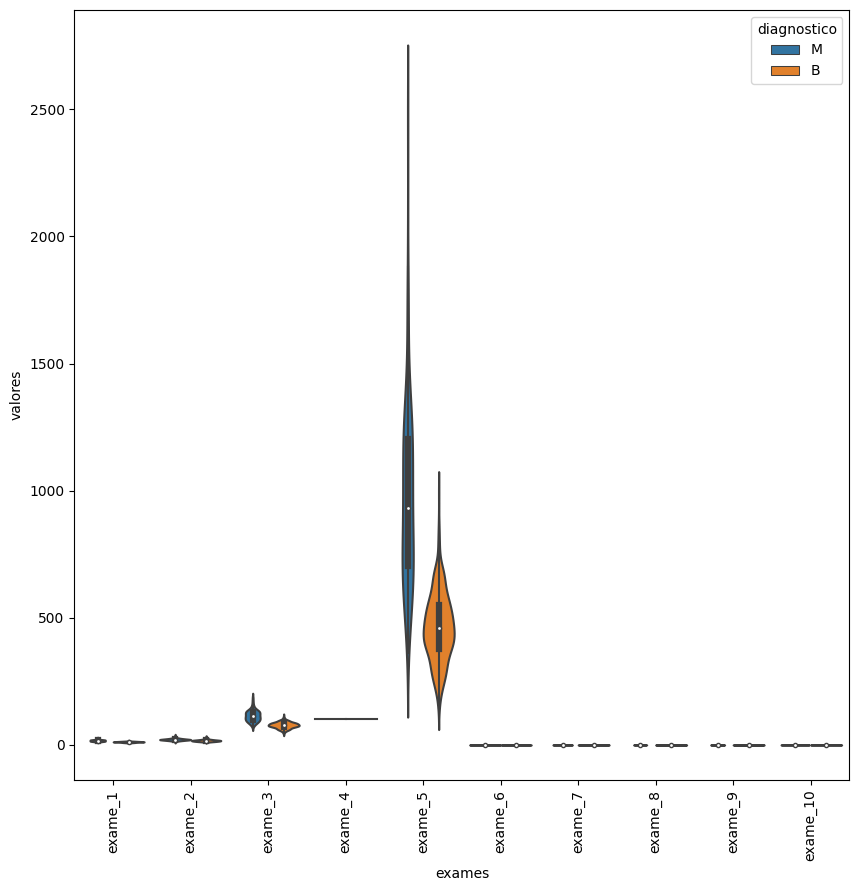

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames", value_name="valores")

plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot)

## Melhorando a visualização

<AxesSubplot:xlabel='exames', ylabel='valores'>

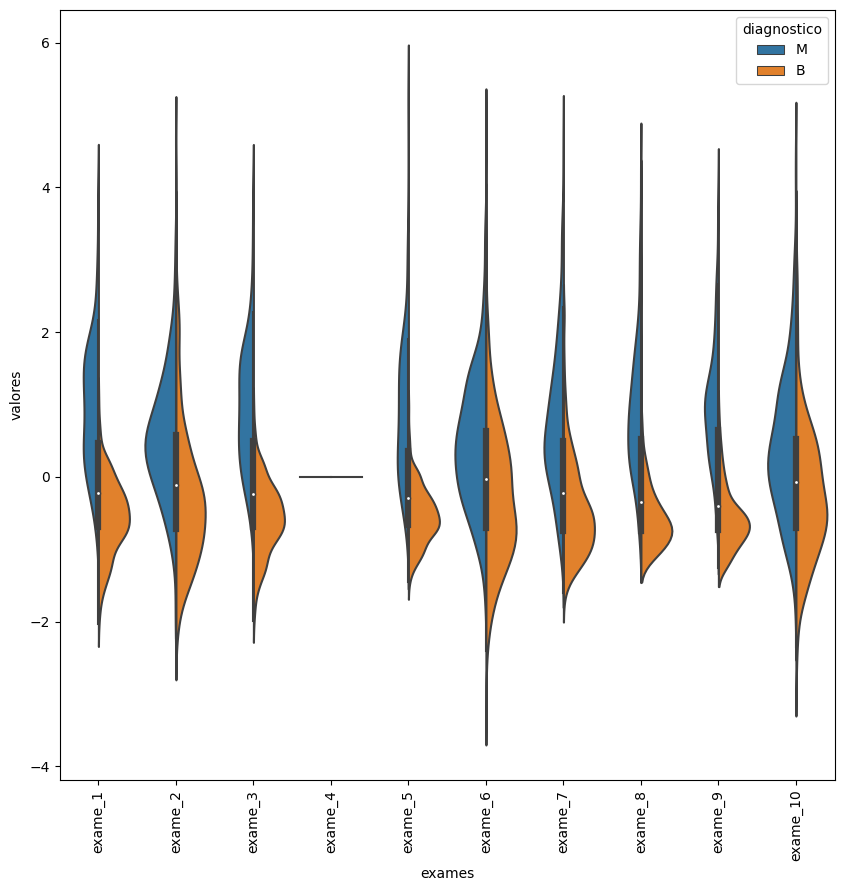

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames", value_name="valores")

plt.figure(figsize=(10, 10))
plt.xticks(rotation=90)
sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True)

## Trabalhando com valores constantes

In [15]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                        var_name="exames", value_name="valores")

    plt.figure(figsize=(10, 10))
    plt.xticks(rotation=90)
    sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True)

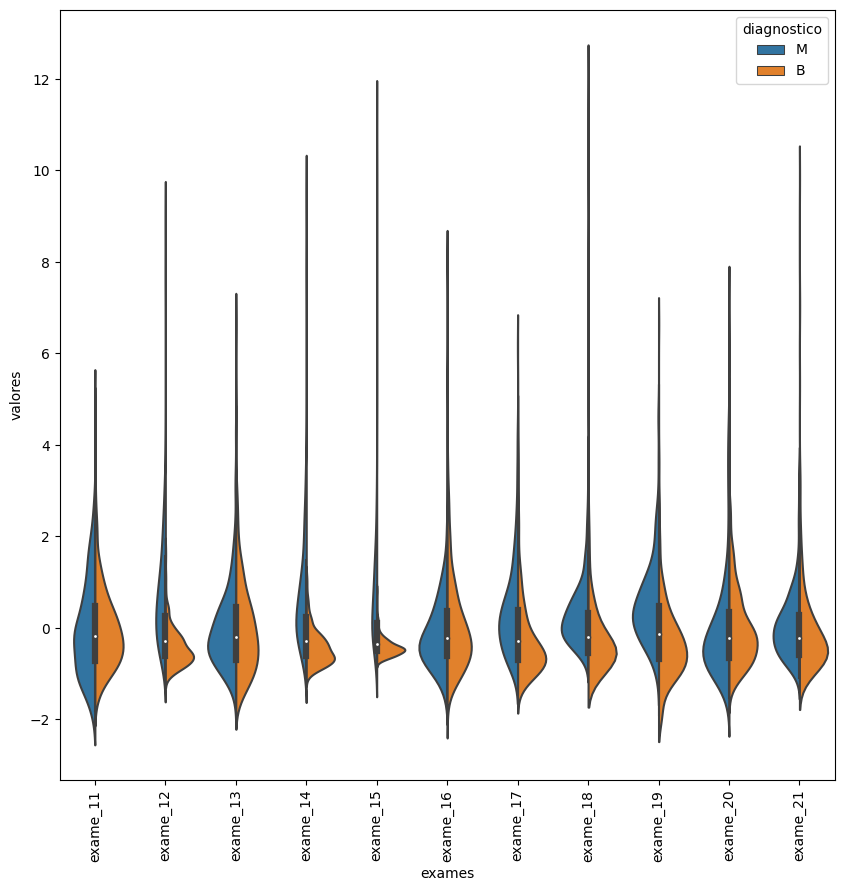

In [16]:
grafico_violino(valores_exames_v2, 10, 21)

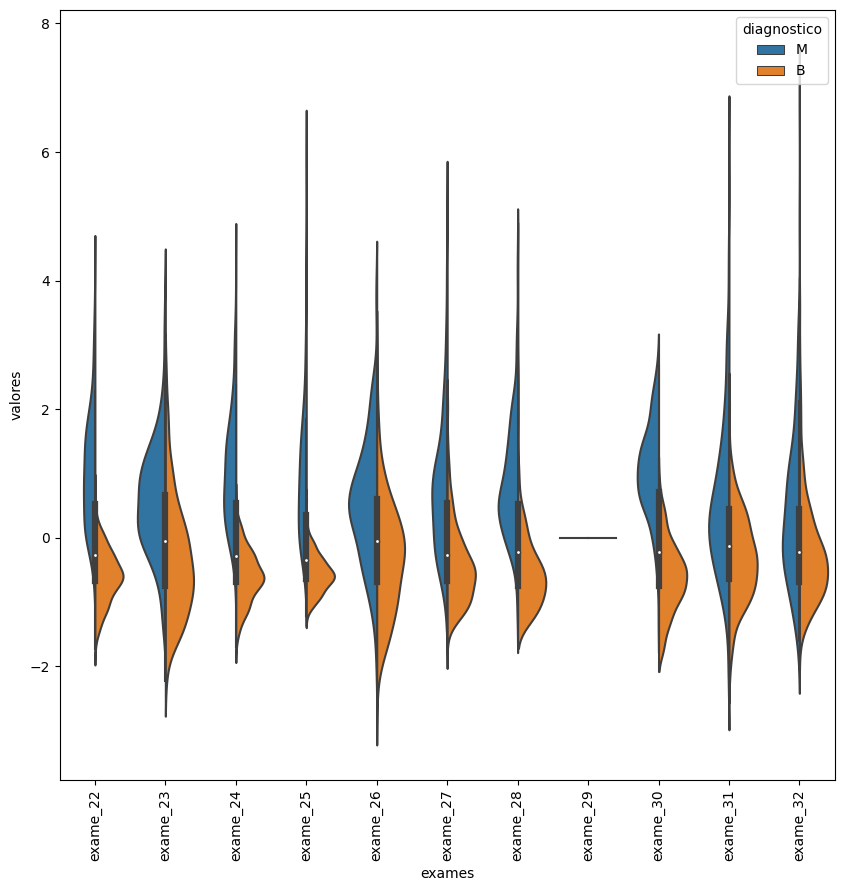

In [17]:
grafico_violino(valores_exames_v2, 21, 32)

In [18]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    
    x_treino, x_teste, y_treino, y_teste = train_test_split(valores, diagnostico, test_size=0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(x_treino, y_treino)
    print("Resultado da classificação %.2f%%" %(classificador.score(x_teste, y_teste)*100))

In [19]:
classificar(valores_exames_v3)

Resultado da classificação 92.98%


## Matriz de correlação

<AxesSubplot:>

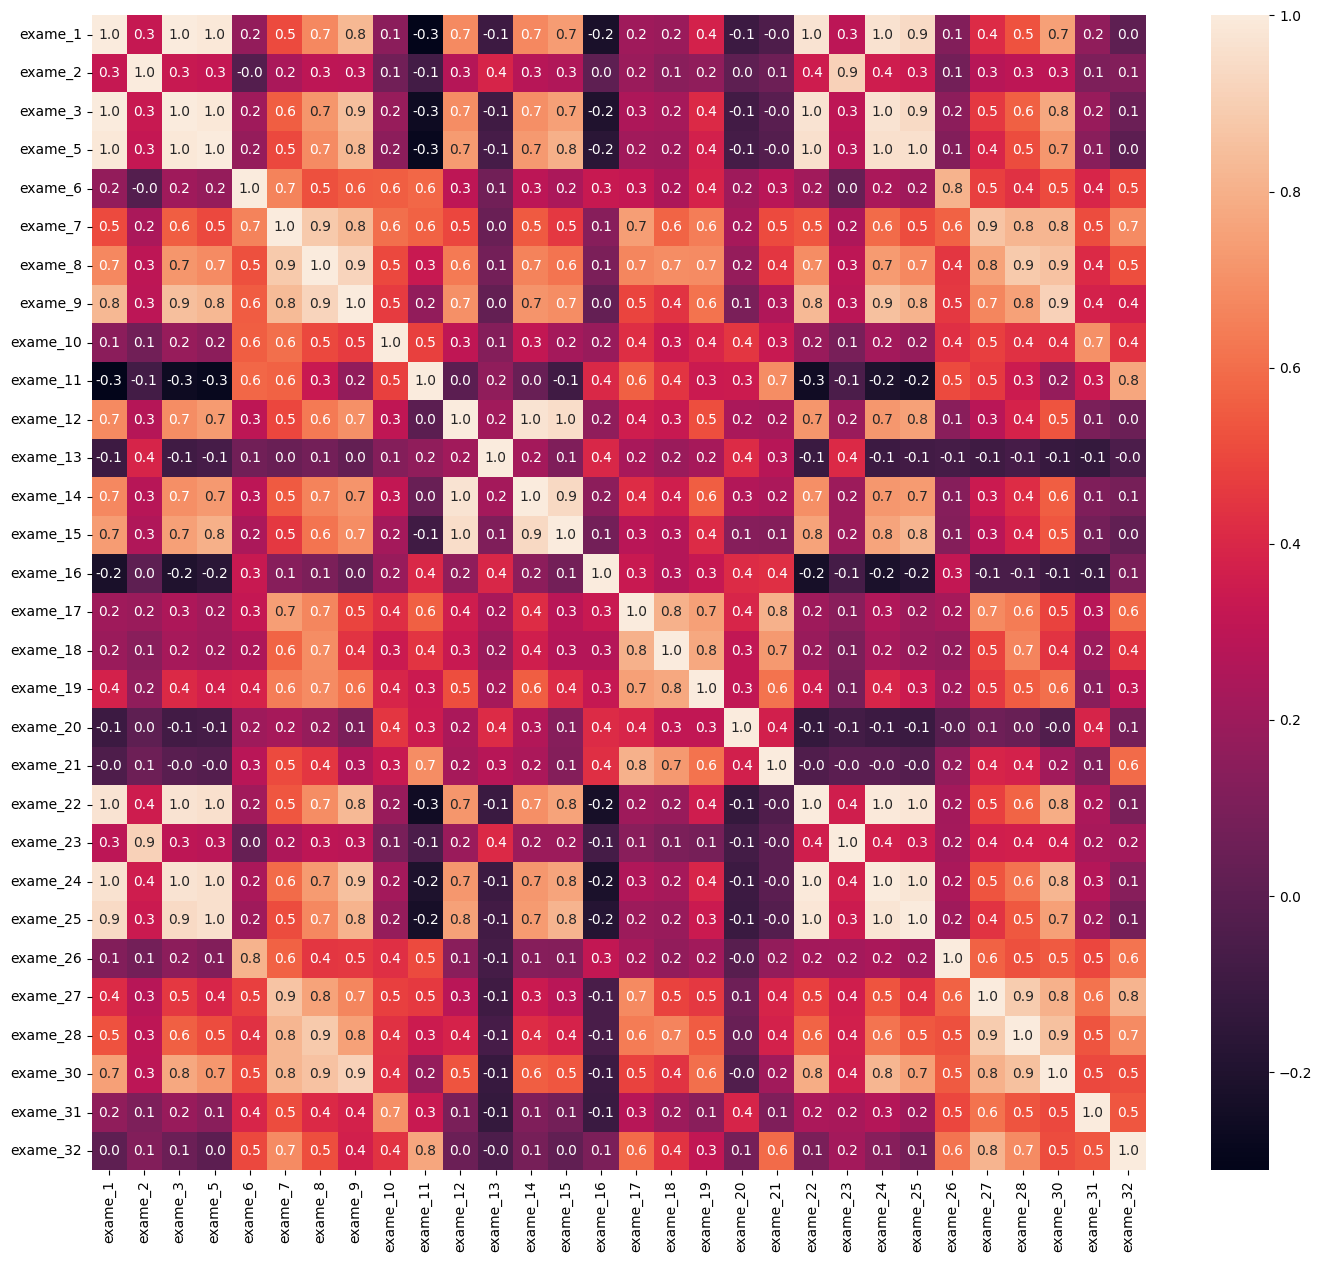

In [20]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(17, 15))
sns.heatmap(matriz_correlacao, annot=True, fmt=".1f")

In [21]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [23]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [24]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [25]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


In [26]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Resultado da classificação 92.98%


## SelectKBest

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
selecionar_kmelhores = SelectKBest(chi2, k=7)
selecionar_kmelhores

SelectKBest(k=7, score_func=<function chi2 at 0x7fede0240040>)

In [29]:
valores_exames_v6 = valores_exames_v1.drop(columns=["exame_3", "exame_4", "exame_24", "exame_29"])
x_treino, x_teste, y_treino, y_teste = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

selecionar_kmelhores.fit(x_treino, y_treino)
treino_kbest = selecionar_kmelhores.transform(x_treino)
teste_kbest = selecionar_kmelhores.transform(x_teste)

In [30]:
treino_kbest.shape

(398, 7)

In [31]:
teste_kbest.shape

(171, 7)

In [32]:
SEED = 1234
random.seed(SEED)

classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(treino_kbest, y_treino)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_kbest, y_teste)*100))

Resultado da classificação 96.49%


## Matriz de confusão

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
matriz_confusao = confusion_matrix(y_teste, classificador.predict(teste_kbest))
matriz_confusao

array([[109,   2],
       [  4,  56]])

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

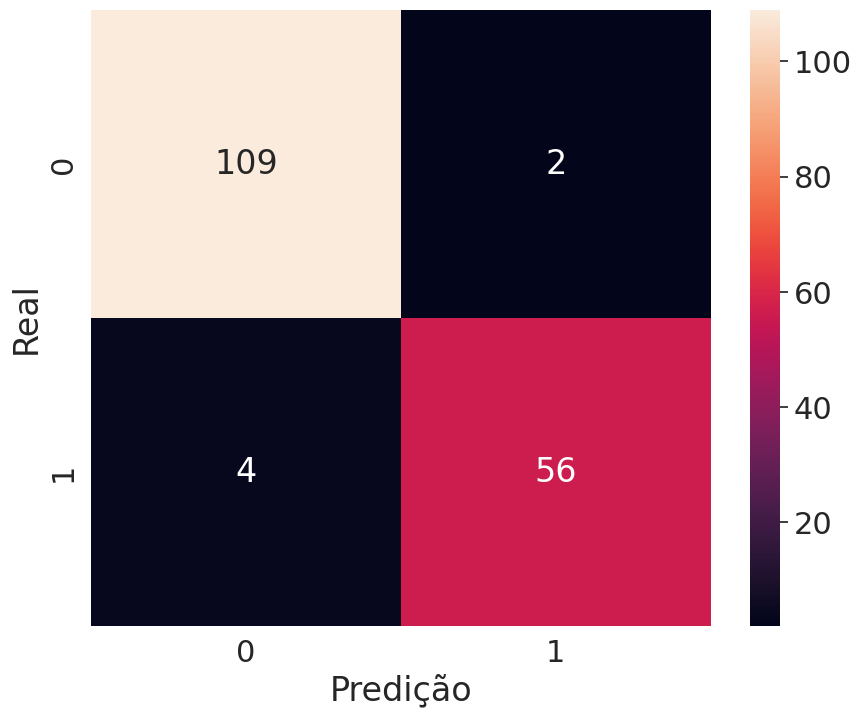

In [35]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

## Seleção com RFE

### Recursive Feature Elimination

In [36]:
from sklearn.feature_selection import RFE

Resultado da classificação 91.23%


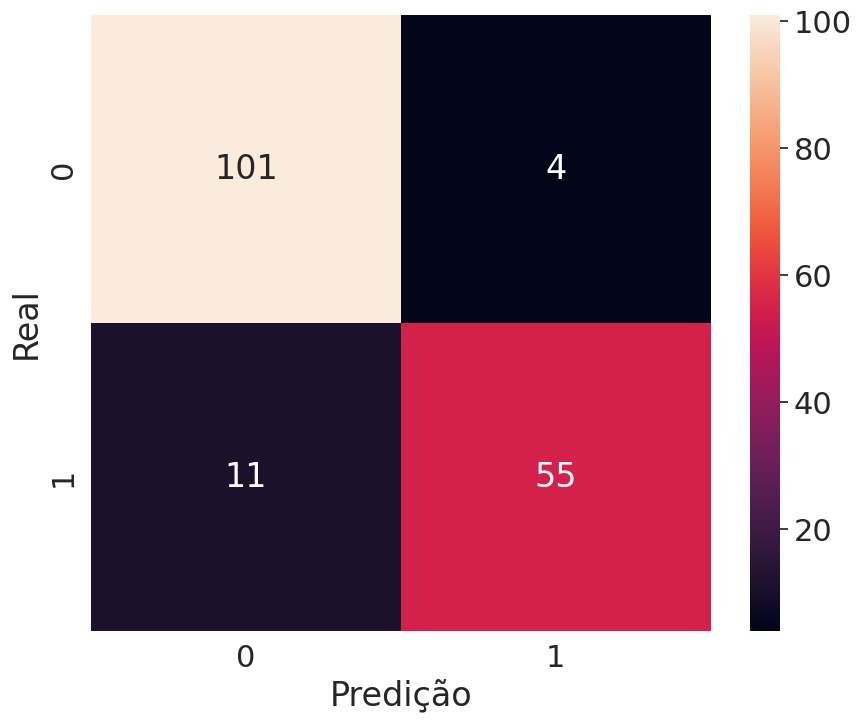

In [37]:
SEED = 1234
random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(x_treino, y_treino)
seletor_rfe = RFE(estimator=classificador, n_features_to_select=7 , step=1)
seletor_rfe.fit(x_treino, y_treino)
treino_rfe = seletor_rfe.transform(x_treino)
teste_rfe = seletor_rfe.transform(x_teste)
classificador.fit(treino_rfe, y_treino)

matriz_confusao = confusion_matrix(y_teste, classificador.predict(teste_rfe))
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe, y_teste)*100))

## Seleção com RFECV

### Recursive Feature Elimination Cross-Validation

In [38]:
from sklearn.feature_selection import RFECV
from numpy import random

Resultado da classificação 92.98%


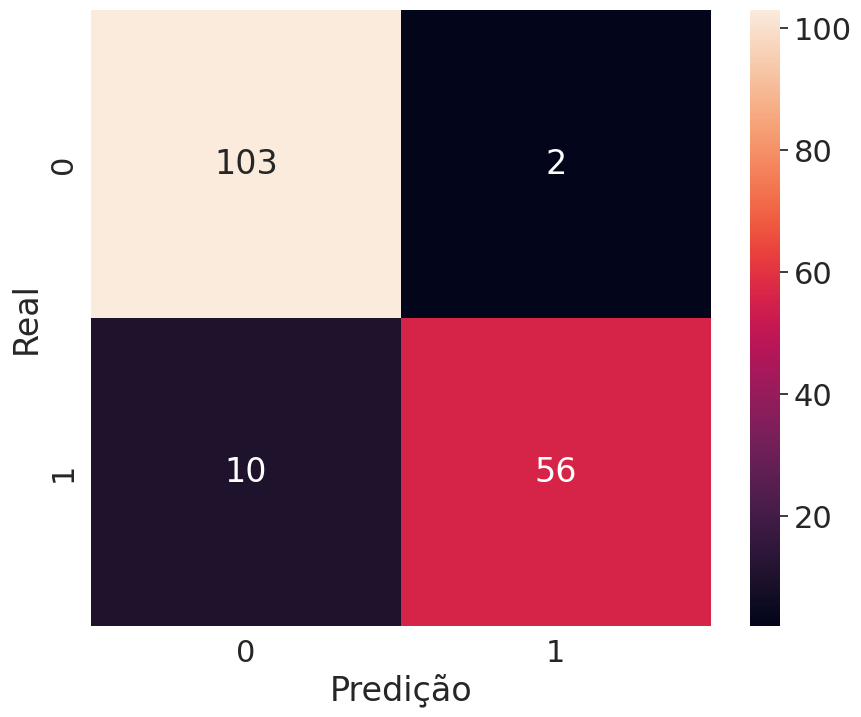

In [39]:
SEED = 1234
random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(x_treino, y_treino)
seletor_rfecv = RFECV(estimator=classificador, cv=5, step=1, scoring="accuracy")
seletor_rfecv.fit(x_treino, y_treino)
treino_rfecv = seletor_rfecv.transform(x_treino)
teste_rfecv = seletor_rfecv.transform(x_teste)
classificador.fit(treino_rfecv, y_treino)

matriz_confusao = confusion_matrix(y_teste, classificador.predict(teste_rfecv))
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfecv, y_teste)*100))

In [40]:
seletor_rfecv.n_features_

26

In [41]:
seletor_rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [43]:
x_treino.columns[seletor_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [44]:
import matplotlib.pyplot as plt

In [49]:
seletor_rfecv.grid_scores_

/home/cristoffer_pogan/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


array([[0.85      , 0.8875    , 0.8625    , 0.89873418, 0.84810127],
       [0.9375    , 0.9375    , 0.9625    , 0.93670886, 0.88607595],
       [0.925     , 0.95      , 0.95      , 0.97468354, 0.93670886],
       [0.9125    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.9375    , 0.9625    , 0.98734177, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.97468354, 0.93670886],
       [0.925     , 0.975     , 0.975     , 0.98734177, 0.94936709],
       [0.9125    , 0.9625    , 0.95      , 0.97468354, 0.93670886],
       [0.925     , 0.9625    , 0.975     , 0.96202532, 0.93670886],
       [0.9375    , 0.975     , 0.9625    , 0.98734177, 0.93670886],
       [0.95      , 0.9625    , 0.9625    , 0.98734177, 0.94936709],
       [0.9625    , 0.95      , 0.975     , 0.98734177, 0.94936709],
       [0.95      , 0.9625    , 0.975     , 0.98734177, 0.93670886],
       [0.95      , 0.95      , 0.

/home/cristoffer_pogan/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


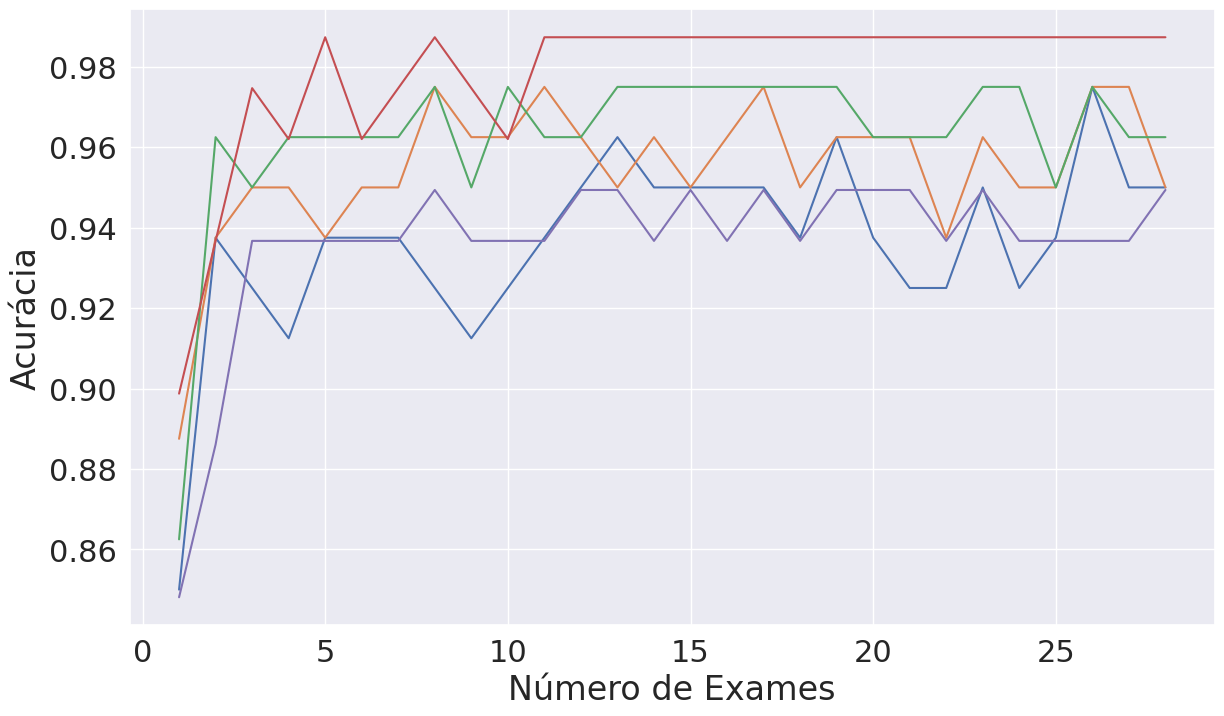

In [48]:
plt.figure(figsize=(14,8))
plt.xlabel("Número de Exames")
plt.ylabel("Acurácia")
plt.plot(range(1, len(seletor_rfecv.grid_scores_) +1), seletor_rfecv.grid_scores_)
plt.show()

## Visualizando dados no plano

Resultado da classificação 87.13%


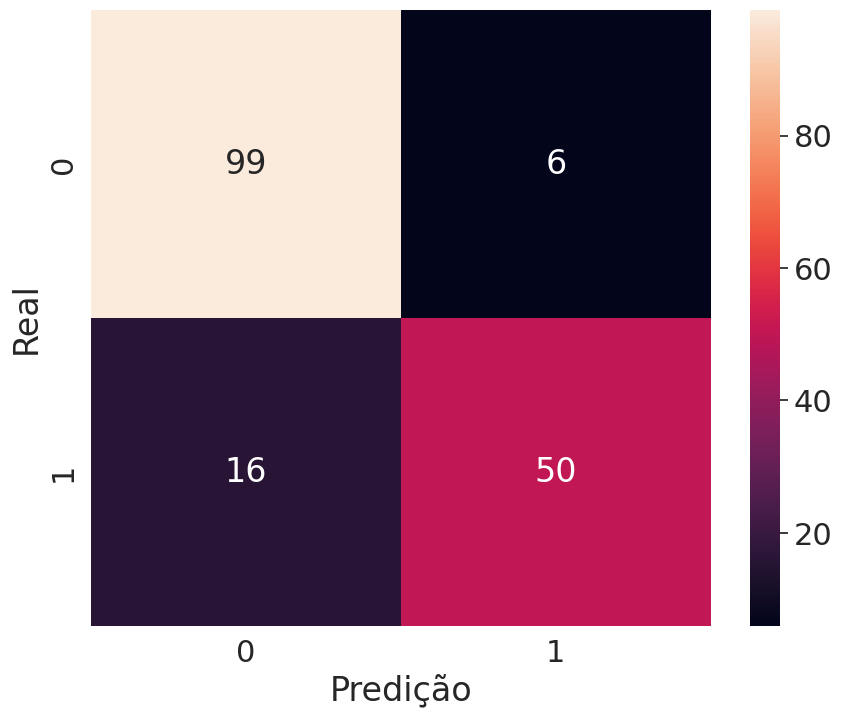

In [57]:
SEED = 1234
random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(valores_exames_v6,
                                                        diagnostico,
                                                        test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100, random_state=SEED)
classificador.fit(x_treino, y_treino)
seletor_rfe_2d = RFE(estimator=classificador, n_features_to_select=2 , step=1)
seletor_rfe_2d.fit(x_treino, y_treino)
treino_rfe = seletor_rfe_2d.transform(x_treino)
teste_rfe = seletor_rfe_2d.transform(x_teste)
classificador.fit(treino_rfe, y_treino)

matriz_confusao = confusion_matrix(y_teste, classificador.predict(teste_rfe))
plt.figure(figsize=(10, 8))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot=True, fmt="d").set(xlabel="Predição", ylabel="Real")

print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe, y_teste)*100))

In [58]:
valores_exames_v7 = seletor_rfe_2d.transform(valores_exames_v6)

In [59]:
valores_exames_v7.shape

(569, 2)

In [60]:
import seaborn as sns

<AxesSubplot:>

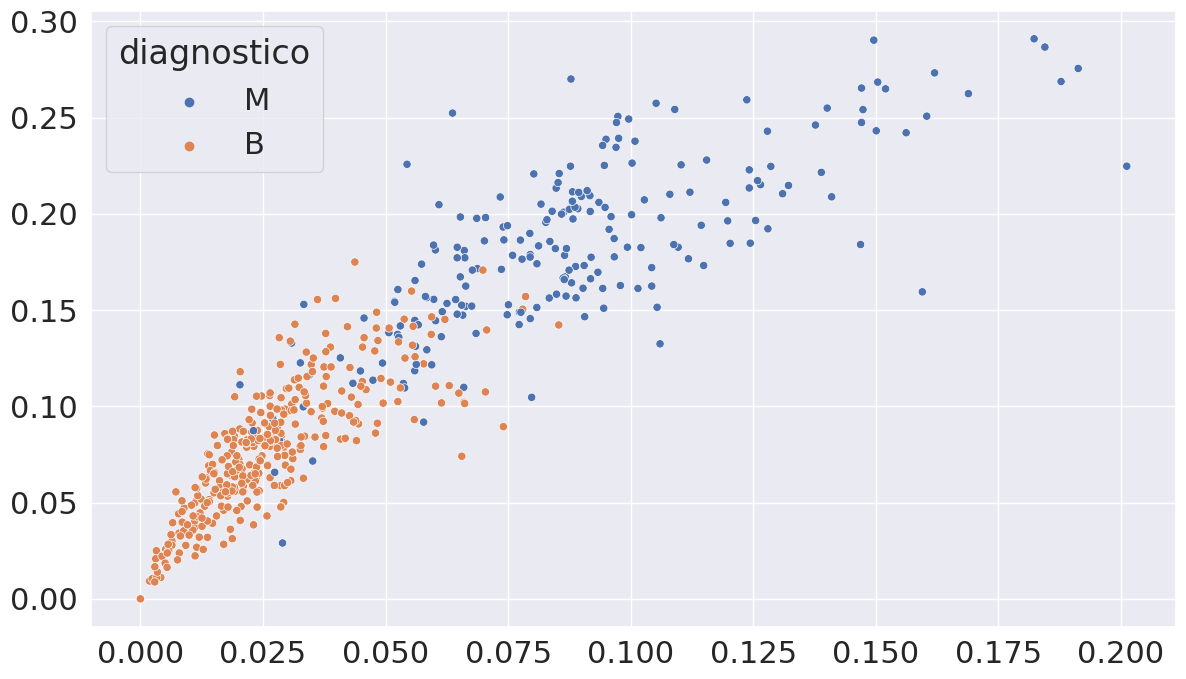

In [61]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:,0], y=valores_exames_v7[:,1], hue=diagnostico)

## PCA e TSNE

### Principal component analysis

In [62]:
from sklearn.decomposition import PCA

<AxesSubplot:>

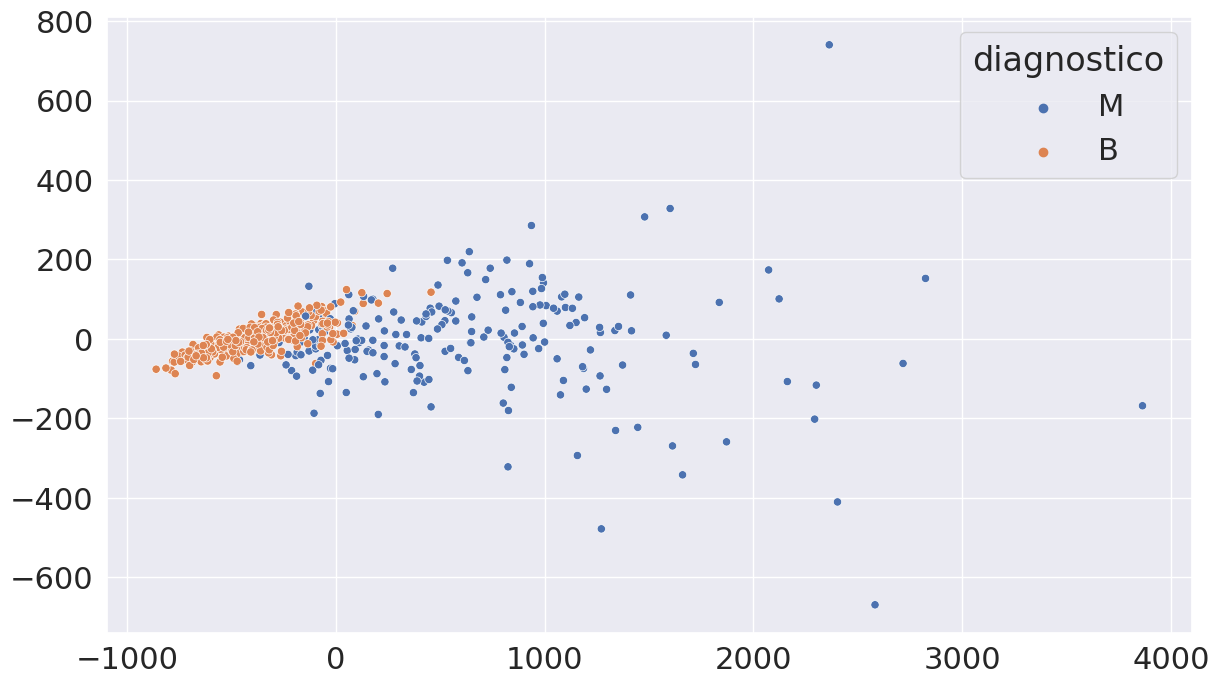

In [65]:
pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue=diagnostico)

<AxesSubplot:>

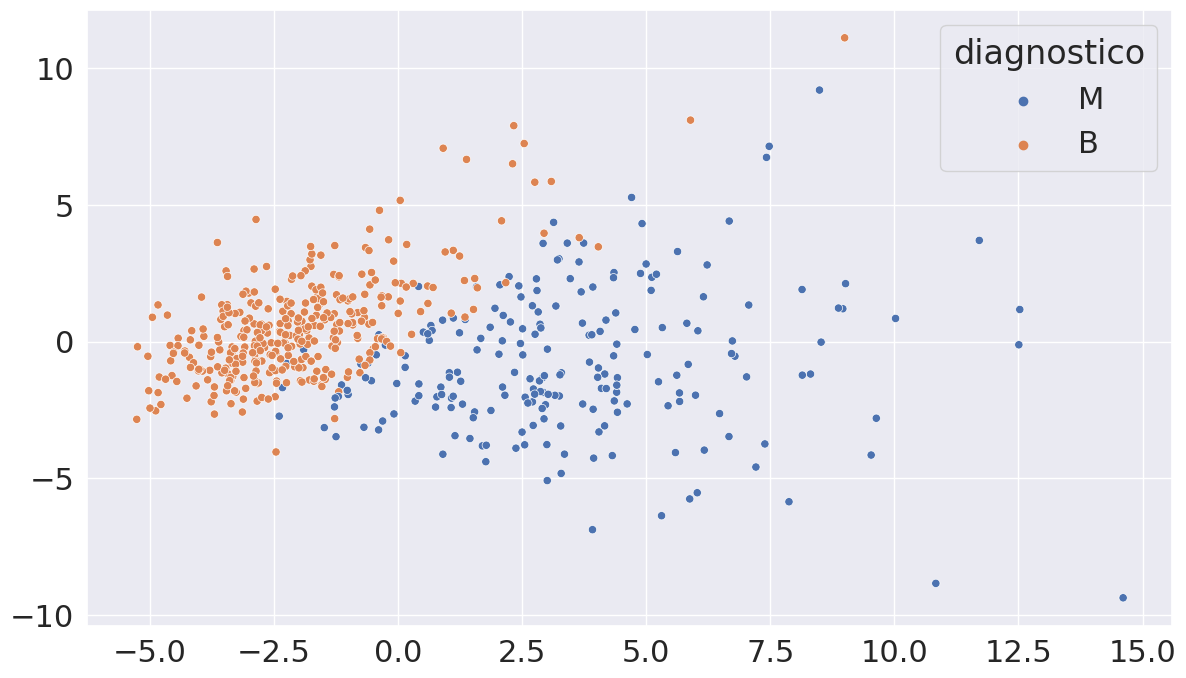

In [66]:
pca = PCA(n_components=2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0], y=valores_exames_v8[:,1], hue=diagnostico)

### t-distributed Stochastic Neighbor Embedding

In [67]:
from sklearn.manifold import TSNE

/home/cristoffer_pogan/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/cristoffer_pogan/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:>

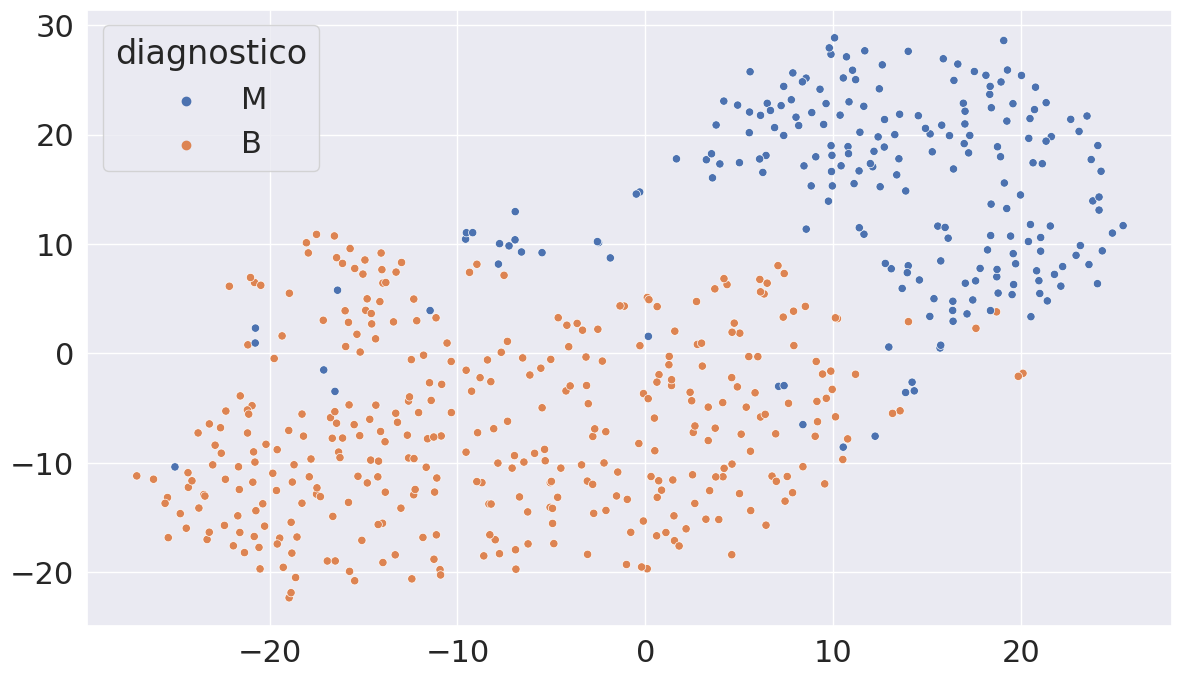

In [68]:
tsne = TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v9[:,0], y=valores_exames_v9[:,1], hue=diagnostico)